# Lab 2
DD2423 Image Analysis and Computer Vision 

## Exercise 1

In [1]:
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt

from Functions import *
from gaussfft import gaussfft

In [2]:
def deltax():
        dxmask = np.array([[0, 0, 0], [0.5, 0, -0.5], [0, 0, 0]]) # This version ensures both dxtools and dytools have the same size
        return dxmask

def sobelx():
        sobelxmask = 1/4*np.array([[1],[2],[1]])*1/2*np.array([[1,0,-1]])
        return sobelxmask

def deltay():
        dymask = np.array([[0, 0.5, 0], [0, 0, 0], [0, -0.5, 0]])
        return dymask

def sobely():
        sobelymask = 1/4*np.array([[1,2,1]])*1/2*np.array([[1],[0],[-1]])
        return sobelymask

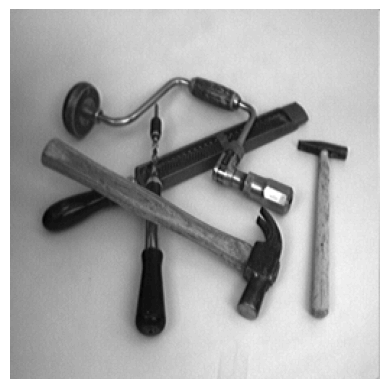

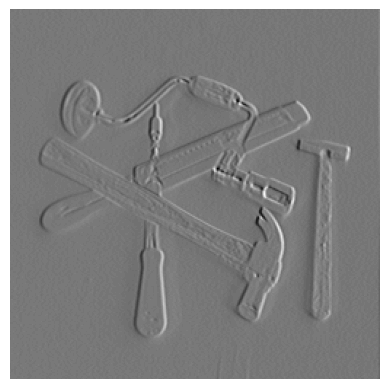

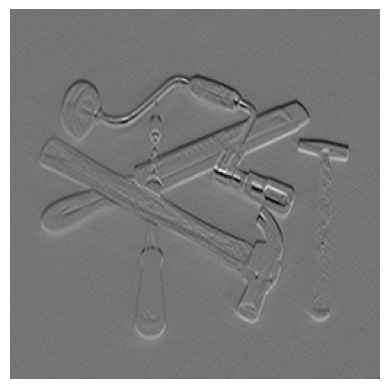

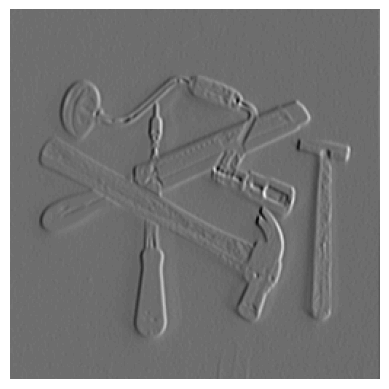

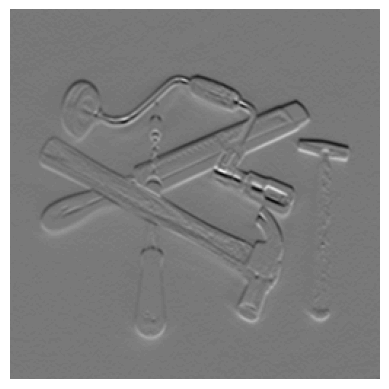

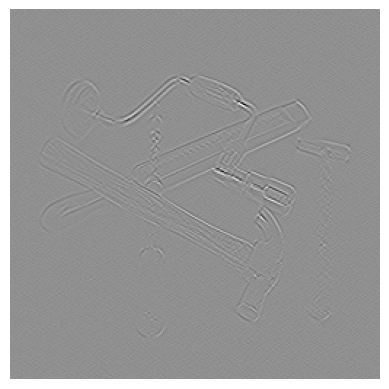

(h, w): (256, 256) (254, 254) (254, 254)


In [3]:
tools = np.load("Images-npy/few256.npy")
dxtools = convolve2d(tools, deltax(), 'valid')
dytools = convolve2d(tools, deltay(), 'valid')
sobelxtools = convolve2d(tools, sobelx(), 'valid')
sobelytools = convolve2d(tools, sobely(), 'valid')

showgrey(tools)
showgrey(dxtools)
showgrey(dytools)
showgrey(sobelxtools)
showgrey(sobelytools)
showgrey(dxtools-sobelxtools)

print("(h, w):", tools.shape, dxtools.shape, dytools.shape)

## Exercise 2

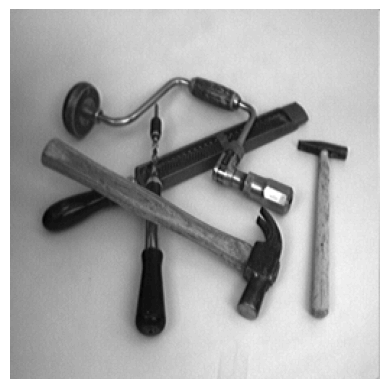

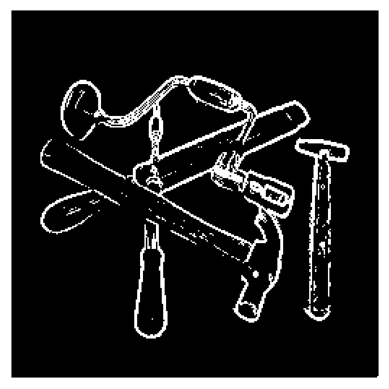

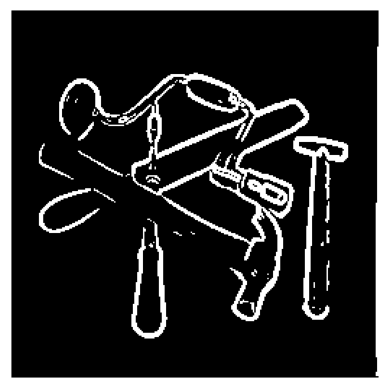

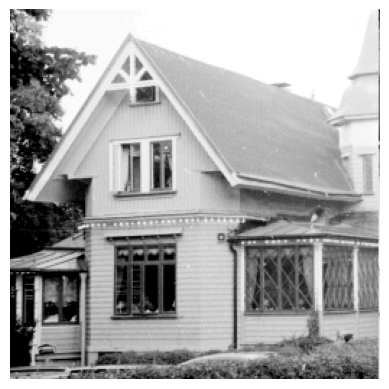

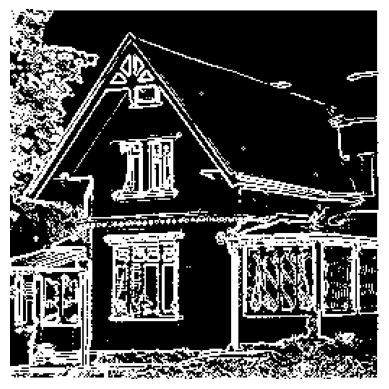

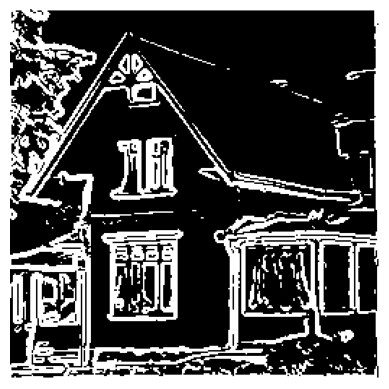

In [4]:
# Lv returns the gradient magnitude in every point of the image. 
# If a nonzero parameter t is provided, the image is filtered with gaussian of variance t
def Lv(inpic, t = 0, shape = 'same'):
    if t:
        inpic = gaussfft(inpic, t)
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)
    

threshold = 20
blur_threshold = 15

tools = np.load("Images-npy/few256.npy")
showgrey(tools)
showgrey((Lv(tools) > threshold).astype(int))
showgrey((Lv(tools, t=1.0) > blur_threshold).astype(int))

godthem = np.load("Images-npy/godthem256.npy")
showgrey(godthem)
showgrey((Lv(godthem) > threshold).astype(int))
showgrey((Lv(godthem, t=1.0) > blur_threshold).astype(int)) # Gaussian blur applied prior to gradient calculation



## Exercise 4

In [5]:
def dxmask():
    dx = np.zeros([5, 5])
    dx[2, 1] = 0.5
    dx[2, 3] = -0.5
    return dx

def dymask():
    dy = np.zeros([5, 5])
    dy[1, 2] = 0.5
    dy[3, 2] = -0.5
    return dy

def dxxmask():
    dxx = np.zeros([5, 5])
    dxx[2, 1] = 1
    dxx[2, 2] = -2
    dxx[2, 3] = 1
    return dxx

def dyymask():
    dyy = np.zeros([5, 5])
    dyy[1, 2] = 1
    dyy[2, 2] = -2
    dyy[3, 2] = 1
    return dyy

def dxymask():
    return convolve2d(dxmask(), dymask(), 'same')

def dxxxmask():
    return convolve2d(dxmask(), dxxmask(), 'same')

def dxxymask():
    return convolve2d(dxxmask(), dymask(), 'same')

def dxxymask2():
    return convolve2d(dxmask(), dxymask(), 'same')

def dxyymask():
    return convolve2d(dxmask(), dyymask(), 'same')

def dyyymask():
    return convolve2d(dymask(), dyymask(), 'same')

def Lvvtilde(inpic, shape="same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Lxx = convolve2d(inpic, dxxmask(), shape)
    Ly = convolve2d(inpic, dymask(), shape)
    Lxy = convolve2d(inpic, dxymask(), shape)
    Lyy = convolve2d(inpic, dyymask(), shape)

    return Lx**2 * Lxx + 2 * Lx * Ly * Lxy + Ly**2 * Lyy

def Lvvvtilde(inpic, shape="same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Ly = convolve2d(inpic, dymask(), shape)
    Lxxx = convolve2d(inpic, dxxxmask(), shape)
    Lxxy = convolve2d(inpic, dxxymask(), shape)
    Lxyy = convolve2d(inpic, dxyymask(), shape)
    Lyyy = convolve2d(inpic, dyyymask(), shape)

    return Lx**3 * Lxxx + 3 * Lx**2 * Ly * Lxxy + 3 * Lx * Ly**2 * Lxyy + Ly**3 * Lyyy

[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
print(convolve2d(x**3, dxxxmask(), 'valid'))      # dxxx(x^3) = 6
print(convolve2d(x**3, dxxmask(), 'valid'))       # dxx(x^3) = 6x
print(convolve2d(x**2*y, dxxymask(), 'valid'))    # dxxy(x^2 * y) = 2
print(convolve2d(x*y**2, dxxmask(), 'valid'))     # dxx(x*y^2) = 0

[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


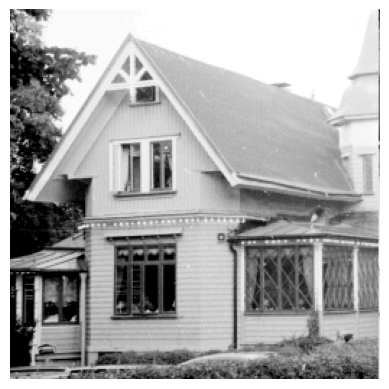

(256, 256) (256, 256) (256, 256)


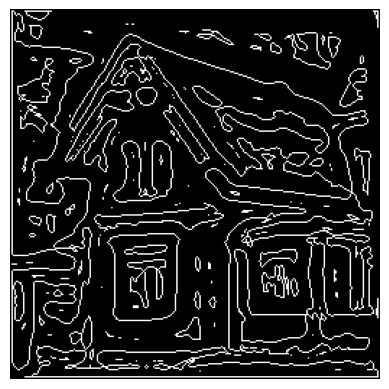

In [6]:
scale = 16.0
house = np.load("Images-npy/godthem256.npy")
showgrey(house)
showgrey(contour(Lvvtilde(discgaussfft(house, scale), 'same')))

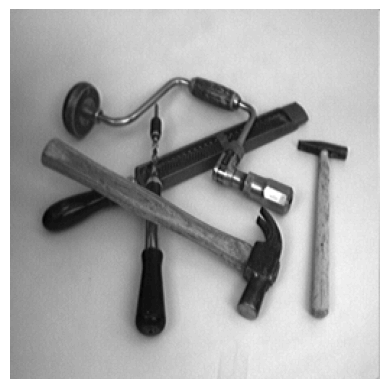

(256, 256) (256, 256) (256, 256)


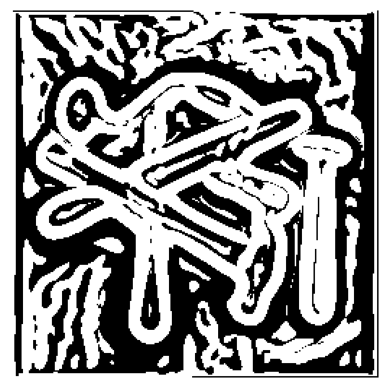

In [7]:
scale = 16.0
tools = np.load("Images-npy/few256.npy")
showgrey(tools)
showgrey((Lvvvtilde(discgaussfft(tools, scale), 'same')<0).astype(int))

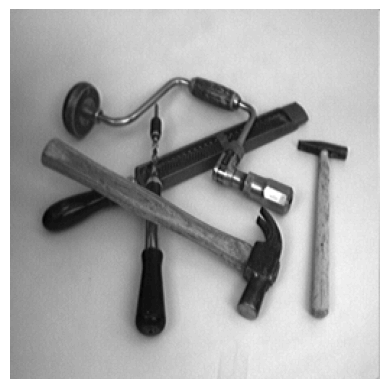

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


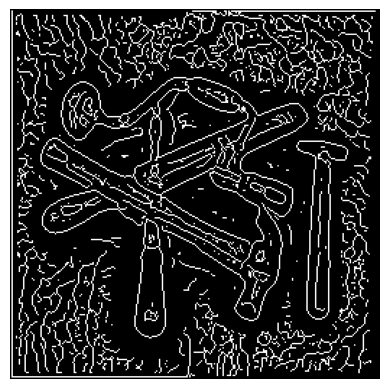

In [8]:
def diff_geom_edge_detection(inpic, scale):
    return contour(Lvvtilde(discgaussfft(inpic, scale), 'same')) * (Lvvvtilde(discgaussfft(inpic, scale), 'same') < 0).astype(int)
inpic = tools
showgrey(inpic)
showgrey(diff_geom_edge_detection(inpic, 4.0))

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256)

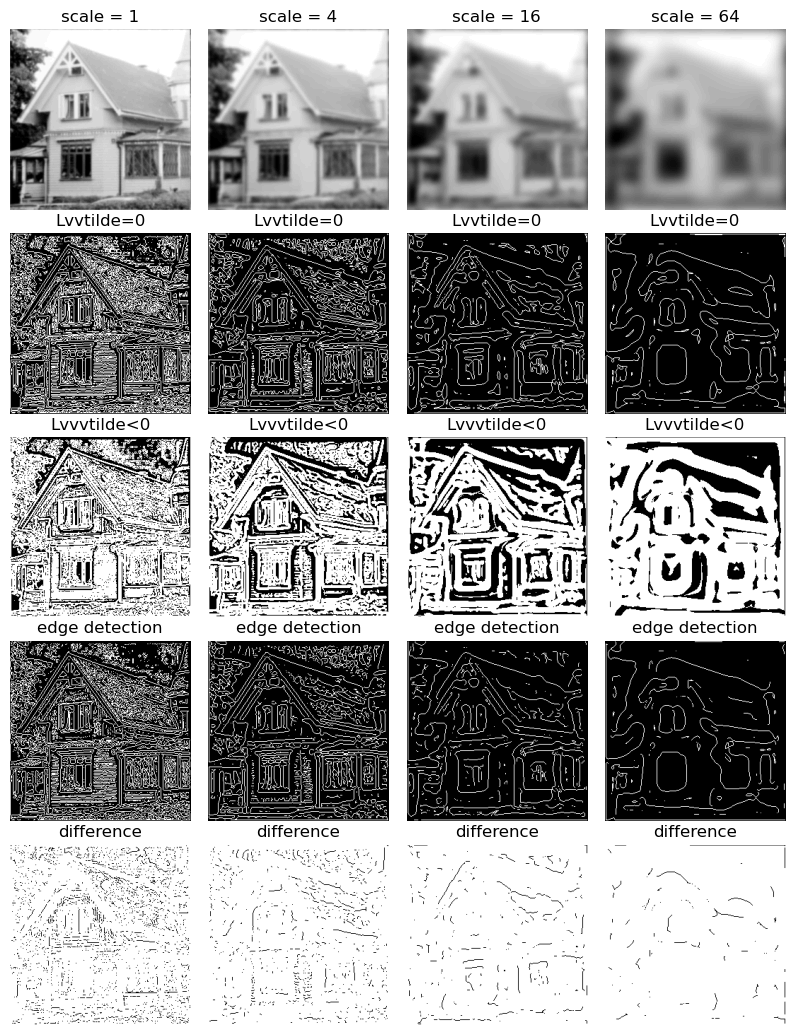

In [9]:

scales = [1, 4, 16, 64]
n_cols = len(scales)
n_rows = 5
f = plt.figure()

inpic = house

f.set_size_inches(10, 15)
f.subplots_adjust(wspace=0.1, hspace=-0.4)
for i, scale in enumerate(scales):
    f.add_subplot(n_rows,n_cols,i+1, title="scale = " + str(scale))
    showgrey(discgaussfft(inpic, scale), display=False)

    f.add_subplot(n_rows,n_cols,i+1+n_cols, title="Lvvtilde=0")
    showgrey(contour(Lvvtilde(discgaussfft(inpic, scale), 'same')), display=False)

    f.add_subplot(n_rows,n_cols,i+1+2*n_cols, title="Lvvvtilde<0")
    showgrey((Lvvvtilde(discgaussfft(inpic, scale), 'same')<0).astype(int), display=False)

    f.add_subplot(n_rows,n_cols,i+1+3*n_cols, title="edge detection")
    showgrey(diff_geom_edge_detection(inpic, scale), display=False)

    f.add_subplot(n_rows,n_cols,i+1+4*n_cols, title="difference")
    showgrey(diff_geom_edge_detection(inpic, scale)-contour(Lvvtilde(discgaussfft(inpic, scale), 'same')), display=False)

    

# Exercise 5

In [10]:
def extractedge(inpic, scale, threshold=0, shape='same'):
    smoothed = gaussfft(inpic, scale)
    Lvv = Lvvtilde(smoothed, shape)
    Lvvv = Lvvvtilde(smoothed, shape)

    # Returns zero-crossings of Lvv for which Lvvv < 0 is true
    curves = zerocrosscurves(Lvv, Lvvv<0)

    if threshold:
        # Removes the points for which second argument is not true (gradient magnitude below threshold)
        curves = thresholdcurves(curves, Lv(smoothed)>threshold)
    
    return curves

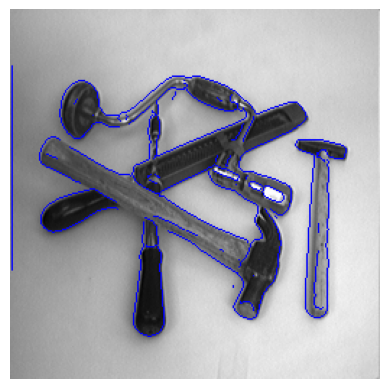

In [11]:
image = np.load("Images-npy/few256.npy")
# image = np.load("Images-npy/godthem256.npy")

scale = 4
threshold = 6


edgecurves = extractedge(image, scale, threshold, 'same')

overlaycurves(image, edgecurves)


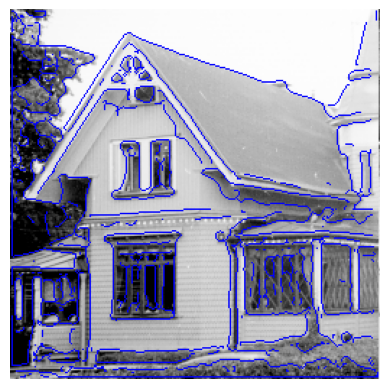

In [12]:
image = np.load("Images-npy/godthem256.npy")

scale = 6
threshold = 3


edgecurves = extractedge(image, scale, threshold, 'same')

overlaycurves(image, edgecurves)


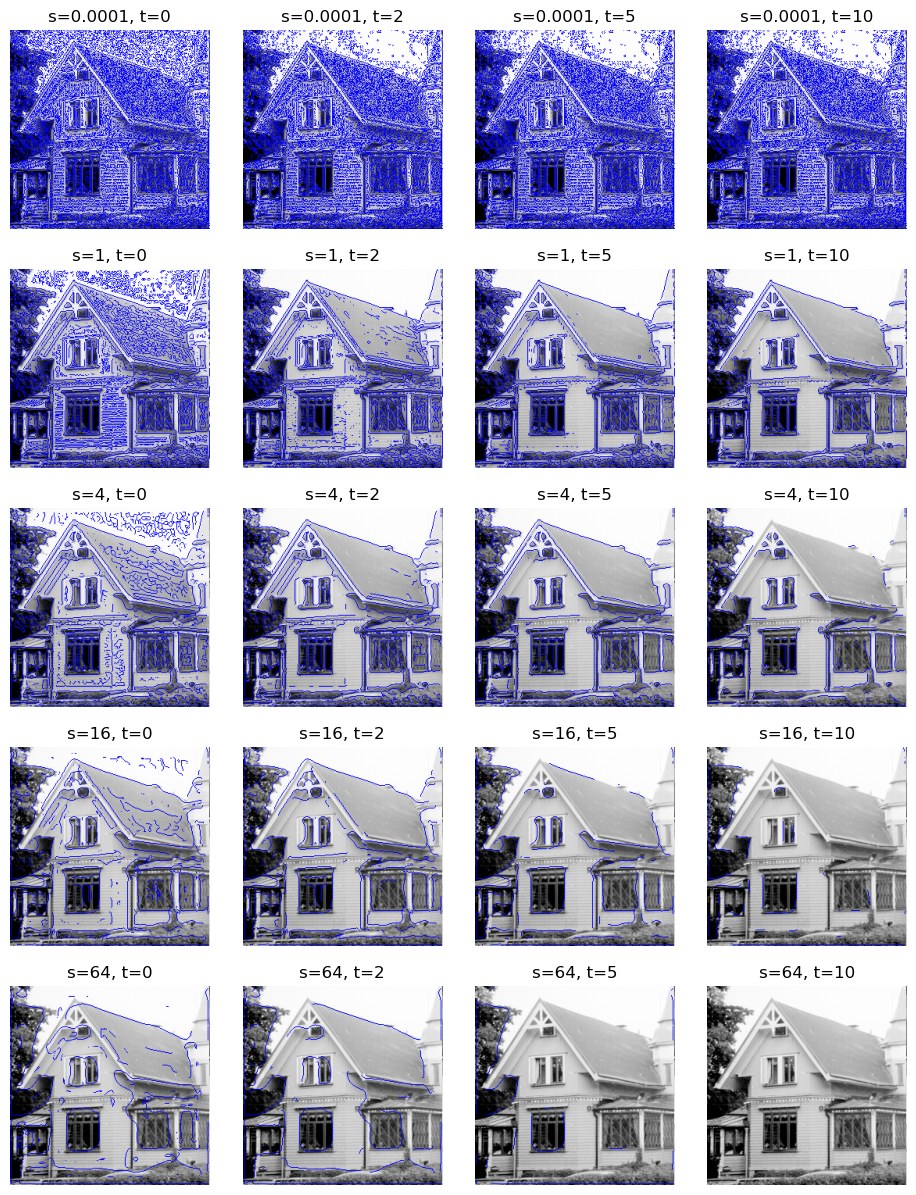

In [13]:
scales = [0.0001, 1, 4, 16, 64]
thresholds = [0, 2, 5, 10]
img = house
f = plt.figure()
f.set_size_inches(15, 15)
f.subplots_adjust(wspace=-0.5, hspace=0.2)
n_rows=len(scales)
n_cols = len(thresholds)
for i, scale in enumerate(scales):
    for j, threshold in enumerate(thresholds):
        f.add_subplot(n_rows,n_cols,i*n_cols+j+1, title="s=" + str(scale)+", t=" + str(threshold))
        edgecurves = extractedge(img, scale, threshold, 'same')
        overlaycurves(img, edgecurves)
        # plt.axis('off')

## Exercise 6

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


[[[10.513749312187858, 3.681058058751677],
  [19.65614001843817, 5.521587088127515],
  [25.141574442188357, 1.5866629563584815],
  [9.599510241562827, 4.886921905584122],
  [11.42798838281289, 3.744524577006016],
  [21.941737695000747, 3.3637254674799806],
  [21.027498624375717, 3.42719198573432],
  [24.684454906875843, 1.2058638468324459],
  [26.055813512813387, 1.7770625111214993],
  [4.571195353125156, 1.967462065884517]],
 array([[4., 0., 0., ..., 1., 2., 2.],
        [0., 4., 2., ..., 2., 3., 0.],
        [5., 0., 2., ..., 1., 0., 5.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

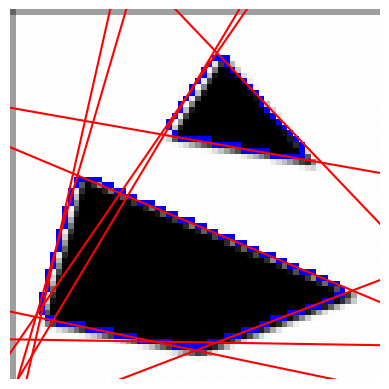

In [51]:
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines, verbose):
    # Allocate accumulator space
    acc = np.zeros((nrho, ntheta))
    linepar = []

    # center curves
    Y, X = curves
    ALL_IMAGE = True
    if ALL_IMAGE:
        n, m = magnitude.shape # we don't need to look that far
        dY, dX = - n//2, - m//2
        Y_C, X_C = Y + dY, X + dX
        max_dist = np.sqrt((n/2)**2 + (m/2)**2)
    else:
        n, m = Y.max()-Y.min(), X.max()-X.min() # only as far as there are edge points
        # center
        dY, dX = - Y.min() - n//2, - X.min() - m//2
        Y_C, X_C = Y + dY, X + dX
        max_dist = np.sqrt(X_C**2 + Y_C**2).max()

    # Define a coordinate system in the accumulator space
    rho_space = np.linspace(0, max_dist, nrho)
    theta_space = np.linspace(0, 2*np.pi, ntheta)

    # Loop over all the edge points
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x_c, y_c = X_C[i], Y_C[i]
        
        # Check if valid point with respect to threshold
        if magnitude[y, x] < threshold:
            continue

        # Optionally, keep value from magnitude image
        # Loop over a set of theta values
        for theta_idx in range(ntheta):
            theta = theta_space[theta_idx]
            # Compute rho for each theta value
            rho = x_c * np.cos(theta) + y_c * np.sin(theta)
            if rho < 0:  # point will be detected with opposite theta
                continue
                # rho = -rho
                # theta = theta + np.pi
            # Compute index values in the accumulator space
            rho_idx = np.argmin(np.abs(rho_space - rho))
            # Update the accumulator
            acc[rho_idx, theta_idx] += 1

    # Extract local maxima from the accumulator
    pos, value, _ = locmax8(acc)
    # Delimit the number of responses if necessary
    indexvector = np.argsort(value)[-nlines:]
    pos = pos[indexvector]
    # Compute a line for each one of the strongest responses in the accumulator
    for idx in range(nlines):
        thetaidxacc = pos[idx, 0]
        rhoidxacc = pos[idx, 1]
        rho = rho_space[rhoidxacc]
        theta = theta_space[thetaidxacc]
        linepar.append([rho, theta])
    
    # Overlay these curves on the gradient magnitude image
    # showgrey(magnitude, display=False)
    for rho, theta in linepar:
        x0_c, y0_c = rho * np.cos(theta), rho * np.sin(theta)
        x0, y0 = x0_c - dX, y0_c - dY
        dx, dy = np.sin(theta), np.cos(theta) # attention!
        plt.plot([x0 - dx*100,x0, x0 + dx*100], [y0 + dy*100, y0, y0 - dy*100], 'r-')

    # Return the output data [linepar, acc]
    return [linepar, acc]

def houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines, verbose):
    # Generate curves for houghline
    curves = extractedge(pic, scale, gradmagnthreshold, 'same')
    
    # For comparison with generated lines
    overlaycurves(pic, curves)

    # Generate magnitude for houghline
    gradmagn = Lv(gaussfft(pic, scale))

    return houghline(curves, gradmagn, nrho, ntheta, threshold, nlines, verbose)
    

testimage1 = np.load("Images-npy/triangle128.npy")
smalltest1 = binsubsample(testimage1)

testimage2 = np.load("Images-npy/houghtest256.npy")
smalltest2 = binsubsample(binsubsample(testimage2))

# showgrey(house, display=False)
houghedgeline(smalltest2, 2, 10, 100, 100, 10, True)
    